In [2]:
!pip install tensorflow

  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 3.7/376.0 MB 19.8 MB/s eta 0:00:19
    --------------------------------------- 5.8/376.0 MB 16.0 MB/s eta 0:00:24
    --------------------------------------- 7.3/376.0 MB 12.6 MB/s eta 0:00:30
    --------------------------------------- 9.2/376.0 MB 11.2 MB/s eta 0:00:33
   - -------------------------------------- 11.0/376.0 MB 10.6 MB/s eta 0:00:35
   - -------------------------------------- 12.8/376.0 MB 10.5 MB/s eta 0:00:35
   - -------------------------------------- 15.2/376.0 MB 10.5 MB/s eta 0:00:35
   - -------------------------------------- 17.6/376.0 MB 10.6 MB/s eta 0:00:34
   -- ------------------------------------- 19.9/376.0 MB 10.8 MB/s eta 0:00:34
   -- ------------------------------------- 22.5/376.0 MB 11.0 M

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
import numpy as np

In [14]:
from tensorflow.keras.datasets import fashion_mnist

In [15]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))

# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [18]:

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:


model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
     

model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 5, validation_split = 0.2)
     


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.7775 - loss: 6.1276 - val_accuracy: 0.8750 - val_loss: 0.3654
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8947 - loss: 0.3000 - val_accuracy: 0.8858 - val_loss: 0.3210
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9121 - loss: 0.2432 - val_accuracy: 0.8832 - val_loss: 0.3324
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9186 - loss: 0.2150 - val_accuracy: 0.8908 - val_loss: 0.3214
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9250 - loss: 0.1980 - val_accuracy: 0.8889 - val_loss: 0.3401


In [22]:


loss, acc = model.evaluate(test_x, test_y)
     


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8803 - loss: 0.3775


In [23]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']

In [24]:
predictions = model.predict(test_x[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


In [25]:

label = labels[np.argmax(predictions)]

ankle_boots


<function matplotlib.pyplot.show(close=None, block=None)>

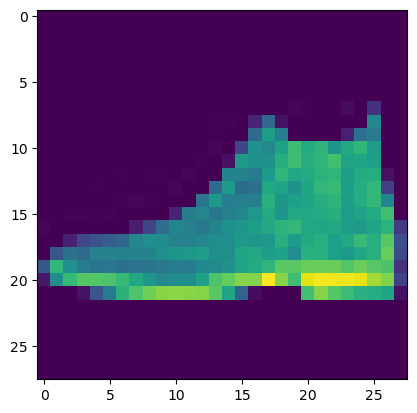

In [26]:

import matplotlib.pyplot as plt
print(label)
plt.imshow(test_x[:1][0])
plt.show